In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

data = pd.read_csv('flight.csv')
df = data.copy()

# Exploratory Data Analysis (EDA)

### Check Null Value, Missing Value, and Data Types

In [2]:
# df.head(5)
df[df['WORK_CITY']=='.']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
20,21501,7/30/2008,11/21/2008,Male,6,.,beijing,CN,49.0,3/31/2014,106,220641,69566.0,122763.0,167113,3/28/2014,4,6.438095,31,4,1.369404,251134,9
27,47114,1/15/2005,3/17/2005,Male,6,.,beijing,CN,47.0,3/31/2014,74,209810,101398.0,83139.0,148685,3/21/2014,11,9.493151,51,8,1.433364,235176,14
40,18793,4/25/2006,6/2/2006,Male,6,.,beijing,CN,48.0,3/31/2014,98,191809,88788.0,85119.0,137876,3/30/2014,2,7.505155,46,11,1.458541,210435,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61806,4388,4/20/2011,12/10/2011,Male,4,.,beijing,CN,40.0,3/31/2014,2,634,756.0,0.0,1586,2/1/2013,425,1.000000,1,0,0.571627,634,0
62035,10787,8/29/2012,10/16/2013,Male,6,.,beijing,CN,55.0,3/31/2014,2,776,0.0,1044.0,1199,10/18/2013,166,2.000000,2,0,0.707698,1133,3
62099,41502,1/1/2012,1/1/2012,Female,4,.,shanghai,CN,44.0,3/31/2014,2,692,NaN,0.0,2085,6/5/2012,666,2.000000,2,0,0.400000,692,0
62546,15528,6/3/2012,6/3/2012,Male,4,.,beijing,CN,44.0,3/31/2014,2,576,970.0,0.0,1629,3/14/2013,384,284.000000,284,0,0.417772,576,0


**There are 667 rows from WORK_CITY and WORK_PROVINCE feature with a single character only (.) instead of the name of the city**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

**The following feature has a missing value on it:**
1. GENDER
2. WORK_CITY
3. WORK_PROVINCE
4. WORK_COUNTRY
5. AGE
6. SUM_YR_1
7. SUM_YR_2

**Also, the date time features like FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE is not on the proper types as well**

### Check Duplicate Values

In [5]:
df.duplicated().sum()

0

**No duplicate values found on the dataset**

### Descriptive Analysis

In [6]:
numericals = ['AGE', 'FFP_TIER', 'EXCHANGE_COUNT','FLIGHT_COUNT', 'BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL', 'MAX_INTERVAL','avg_discount','Points_Sum','Point_NotFlight']
categoricals = ['FFP_DATE','GENDER','FIRST_FLIGHT_DATE','WORK_CITY', 'WORK_PROVINCE','WORK_COUNTRY','LAST_FLIGHT_DATE']

#LOAD_TIME only contain one value

In [7]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**Almost all the features are having a quite major of the gap between min and max OR Q3 and max (outliers indications), except for the following features:**
1. FFP_TIER
2. EXCHANGE_COUNT
3. avg_discount

### Univariate Analysis

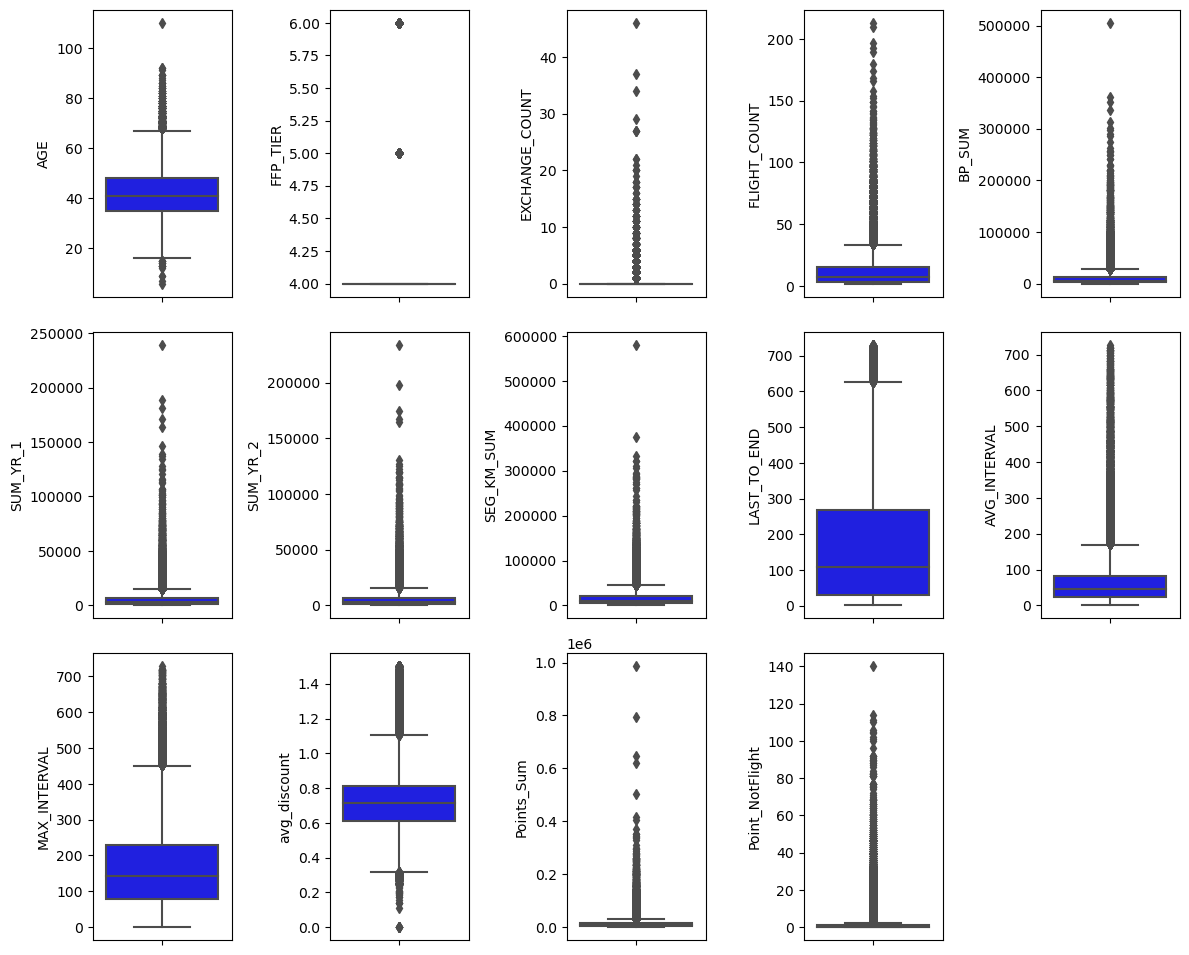

In [8]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.boxplot(y=df[numericals[i]], color='blue', orient='v')
    plt.tight_layout()

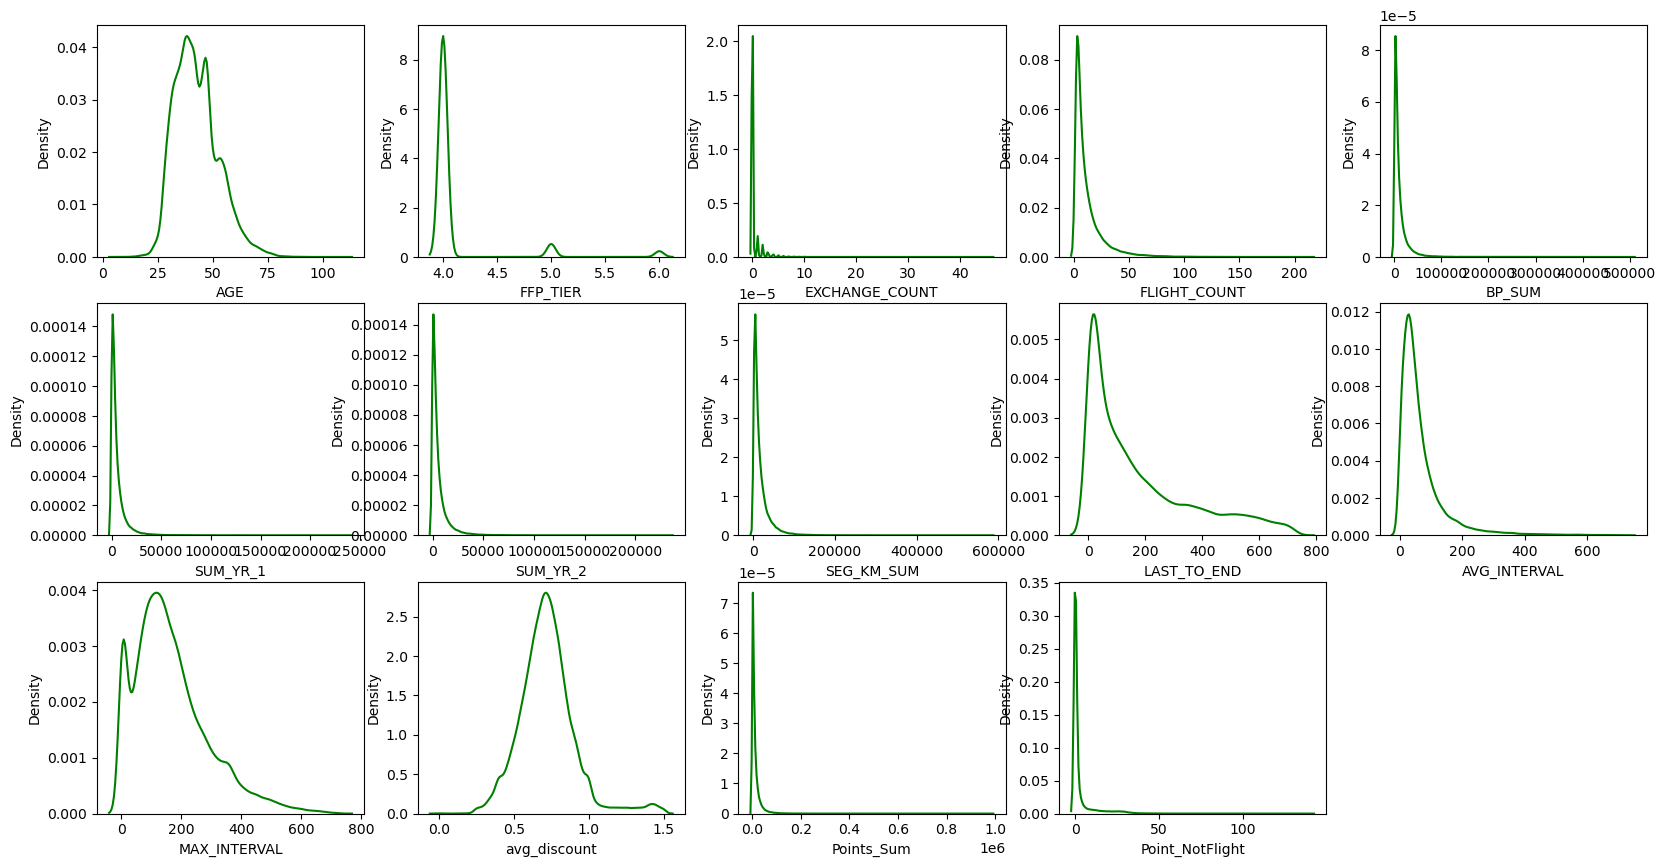

In [9]:
plt.figure(figsize=(20,50))
for i in range(len(numericals)):
    plt.subplot(len(numericals), 5, i+1)
    sns.kdeplot(x=df[numericals[i]], color='green')

**The only feature with normal distribution is AGE**

### Multivariate Analysis

<AxesSubplot:>

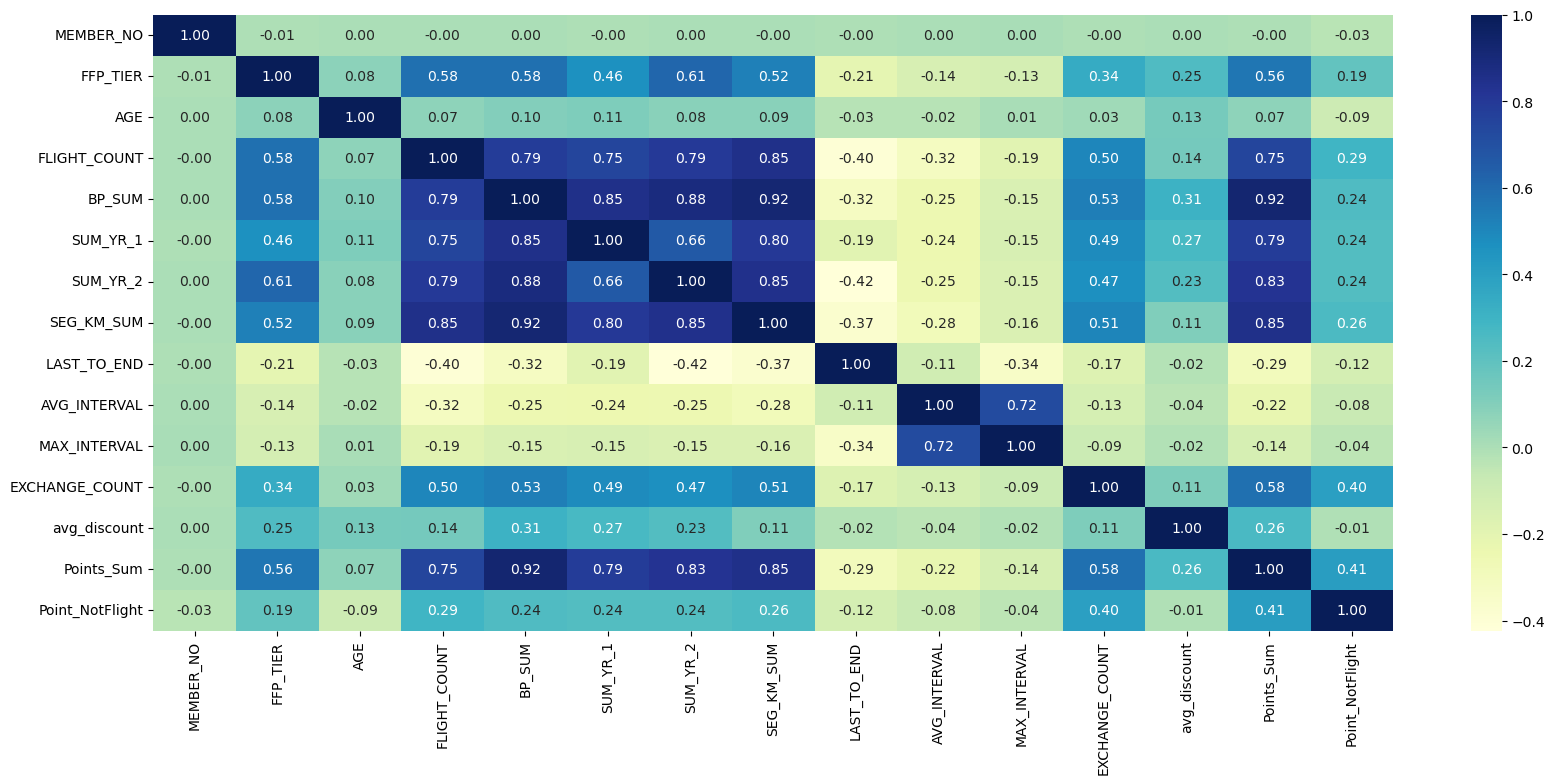

In [10]:
corr = df.corr(method='pearson')

plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')

In [11]:
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7: # jika korelasi lebih besar dari 0.7
            print(f"{corr.columns[i]} and {corr.columns[j]} have a correlation of \033[1m{corr.iloc[i, j]:.2f}\033[0m")
            high_corr.append((corr.columns[i], corr.columns[j]))

print(f"Features with High Correlation: {high_corr}")

BP_SUM and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_1 and FLIGHT_COUNT have a correlation of 0.75
SUM_YR_1 and BP_SUM have a correlation of 0.85
SUM_YR_2 and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_2 and BP_SUM have a correlation of 0.88
SEG_KM_SUM and FLIGHT_COUNT have a correlation of 0.85
SEG_KM_SUM and BP_SUM have a correlation of 0.92
SEG_KM_SUM and SUM_YR_1 have a correlation of 0.80
SEG_KM_SUM and SUM_YR_2 have a correlation of 0.85
MAX_INTERVAL and AVG_INTERVAL have a correlation of 0.72
Points_Sum and FLIGHT_COUNT have a correlation of 0.75
Points_Sum and BP_SUM have a correlation of 0.92
Points_Sum and SUM_YR_1 have a correlation of 0.79
Points_Sum and SUM_YR_2 have a correlation of 0.83
Points_Sum and SEG_KM_SUM have a correlation of 0.85
Features with High Correlation: [('BP_SUM', 'FLIGHT_COUNT'), ('SUM_YR_1', 'FLIGHT_COUNT'), ('SUM_YR_1', 'BP_SUM'), ('SUM_YR_2', 'FLIGHT_COUNT'), ('SUM_YR_2', 'BP_SUM'), ('SEG_KM_SUM', 'FLIGHT_COUNT'), ('SEG_KM_SUM', 'BP_SUM'), 

**Based on the multivariate analysis above, there are some features with the high correlation scores with the other feature. Meaning, there are a redundant possibility among those features. Thus, it needs further analysis to determine whether one of the features should be deleted or not**

# Data Preprocessing

### Handling Missing and Incorrect Value

In [12]:
df[categoricals].describe()

,FFP_DATE,GENDER,FIRST_FLIGHT_DATE,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LAST_FLIGHT_DATE
count,62988,62985,62988,60719,59740,62962,62988
unique,3068,2,3406,3234,1165,118,731
top,1/13/2011,Male,2/16/2013,guangzhou,guangdong,CN,3/31/2014
freq,184,48134,96,9386,17509,57748,959


In [13]:
mode_value_work_city = df['WORK_CITY'].mode()[0]
mode_value_work_province = df['WORK_PROVINCE'].mode()[0]

df['WORK_CITY'] = df['WORK_CITY'].replace('.', mode_value_work_city)
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].replace('.', mode_value_work_province)

In [14]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,guangzhou,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,guangzhou,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


**Changing the dot (.) value in WORK_CITY into the mode value**

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

**Because the missing value is around 5%, it still safe to be deleted from the dataset**

In [17]:
#Deleting Member ID Column
df = df.drop(columns=['MEMBER_NO'])

In [18]:
df.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
5633,11/21/2007,3/13/2008,Male,4,guangzhou,guangdong,CN,33.0,3/31/2014,32,25851,13174.0,16341.0,45976,3/2/2014,30,22.387097,139,3,0.692913,25851,3
40761,1/4/2011,10/25/2011,Male,4,beijing,beijing,CN,32.0,3/31/2014,7,2439,2584.0,1549.0,8174,11/1/2013,152,57.000000,146,0,0.548226,2439,0
26048,4/22/2012,4/22/2012,Female,4,Seongbuk-gu,Seoul,KR,37.0,3/31/2014,5,6594,8260.0,0.0,11610,11/26/2012,492,54.500000,202,0,0.780000,6594,0
61783,11/1/2010,11/11/2012,Male,4,shanghai,shanghai,CN,32.0,3/31/2014,3,810,972.0,0.0,2283,2/26/2013,400,53.500000,97,0,0.400000,810,0
49597,1/17/2012,9/4/2012,Male,4,xinjiangwushi,xinjiang,CN,29.0,3/31/2014,5,1419,0.0,0.0,8782,7/10/2013,266,77.250000,129,1,0.321198,15195,16


### Handling Incorrect Data Types

In [19]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')

### Encode All Categoricals Value

In [20]:
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
df_encode = df.copy()
for i in cats:
    df_encode[i] = df_encode[i].astype('category').cat.codes

In [21]:
df_encode.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
33603,2008-12-21,2008-12-21,1,4,2920,928,21,38.0,2014-03-31,10,5047,5546.0,671.0,8868,2014-03-03,29,67.444444,286,0,0.712079,5047,0
34686,2007-05-30,2013-01-11,1,4,2462,874,21,42.0,2014-03-31,6,5477,429.0,3660.0,5925,2014-03-19,13,86.600000,259,0,1.012203,5477,0
55473,2010-05-26,2013-12-20,1,4,1562,812,21,41.0,2014-03-31,2,1263,0.0,1863.0,2546,2014-01-21,71,32.000000,32,0,0.760935,1263,0
16991,2007-08-30,2007-09-05,1,4,2459,962,21,52.0,2014-03-31,11,8284,6235.0,0.0,19463,2013-01-12,445,27.900000,89,0,0.734933,9085,1
15200,2006-11-23,2008-04-06,1,4,1825,874,21,46.0,2014-03-31,26,11500,2143.0,12757.0,27947,2014-03-31,1,29.120000,175,2,0.564159,26603,39


### Removing Outliers

In [22]:
def remove_outliers(column):
    for col in column:
        Q1 = df_encode[col].quantile(0.25)
        Q3 = df_encode[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1-(1.5*IQR)
        high_limit = Q3+(1.5*IQR)
        filtered_entries = ((df_encode[col] >= low_limit) & (df_encode[col] <= high_limit))
    
    return df_encode[filtered_entries]

In [23]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58255 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           58255 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  58255 non-null  datetime64[ns]
 2   GENDER             58255 non-null  int8          
 3   FFP_TIER           58255 non-null  int64         
 4   WORK_CITY          58255 non-null  int16         
 5   WORK_PROVINCE      58255 non-null  int16         
 6   WORK_COUNTRY       58255 non-null  int8          
 7   AGE                58255 non-null  float64       
 8   LOAD_TIME          58255 non-null  datetime64[ns]
 9   FLIGHT_COUNT       58255 non-null  int64         
 10  BP_SUM             58255 non-null  int64         
 11  SUM_YR_1           58255 non-null  float64       
 12  SUM_YR_2           58255 non-null  float64       
 13  SEG_KM_SUM         58255 non-null  int64         
 14  LAST_F

In [24]:
df_encode = remove_outliers(df_encode.columns)

In [25]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47506 entries, 43 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           47506 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  47506 non-null  datetime64[ns]
 2   GENDER             47506 non-null  int8          
 3   FFP_TIER           47506 non-null  int64         
 4   WORK_CITY          47506 non-null  int16         
 5   WORK_PROVINCE      47506 non-null  int16         
 6   WORK_COUNTRY       47506 non-null  int8          
 7   AGE                47506 non-null  float64       
 8   LOAD_TIME          47506 non-null  datetime64[ns]
 9   FLIGHT_COUNT       47506 non-null  int64         
 10  BP_SUM             47506 non-null  int64         
 11  SUM_YR_1           47506 non-null  float64       
 12  SUM_YR_2           47506 non-null  float64       
 13  SEG_KM_SUM         47506 non-null  int64         
 14  LAST_

In [26]:
df_encode.isna().sum()

FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1               0
SUM_YR_2               0
SEG_KM_SUM             0
LAST_FLIGHT_DATE     312
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [27]:
#Drop Missing Value After Removing Outliers
df_encode.dropna(inplace=True)

In [28]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47194 entries, 43 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           47194 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  47194 non-null  datetime64[ns]
 2   GENDER             47194 non-null  int8          
 3   FFP_TIER           47194 non-null  int64         
 4   WORK_CITY          47194 non-null  int16         
 5   WORK_PROVINCE      47194 non-null  int16         
 6   WORK_COUNTRY       47194 non-null  int8          
 7   AGE                47194 non-null  float64       
 8   LOAD_TIME          47194 non-null  datetime64[ns]
 9   FLIGHT_COUNT       47194 non-null  int64         
 10  BP_SUM             47194 non-null  int64         
 11  SUM_YR_1           47194 non-null  float64       
 12  SUM_YR_2           47194 non-null  float64       
 13  SEG_KM_SUM         47194 non-null  int64         
 14  LAST_

### Data Extraction - Date Time

In [29]:
#dow: day_of_week
df_encode['dow_ffp_date'] = df_encode['FFP_DATE'].dt.dayofweek
df_encode['dow_first_flight_date'] = df_encode['FIRST_FLIGHT_DATE'].dt.dayofweek
df_encode['dow_load_date'] = df_encode['LOAD_TIME'].dt.dayofweek
df_encode['dow_last_flight_date'] = df_encode['LAST_FLIGHT_DATE'].dt.dayofweek

In [30]:
df_encode = df_encode.drop(columns=['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE'])
df_encode.sample(5)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,dow_ffp_date,dow_first_flight_date,dow_load_date,dow_last_flight_date
36543,1,4,2417,1025,21,36.0,5,5271,5376.0,0.0,6540,440,61.000000,110,0,0.840000,5271,0,0,0,0,3
3635,1,4,1825,874,21,38.0,29,33664,27423.0,8046.0,52231,118,21.285714,136,0,0.769318,33764,1,6,6,0,3
38755,1,4,1825,874,21,50.0,4,3669,4310.0,3200.0,6924,346,12.666667,20,0,0.712500,3669,0,4,3,0,6
30089,1,4,2459,962,21,50.0,5,5769,0.0,1368.0,9098,181,116.750000,266,0,0.818585,5769,0,3,3,0,3
62292,0,4,493,267,21,47.0,2,634,630.0,0.0,1470,514,0.000000,0,0,0.525034,634,0,6,6,0,6


### Removing Redundant Feature

**Based on the correlation analysis before and the Feature Importance analysis, therefore, the following features will be deleted due to redundant value:**
1. FLIGHT_COUNT
2. BP_SUM
3. SUM_YR_1
4. SUM_YR_2
5. SEG_KM_SUM
6. MAX_INTERVAL

In [31]:
df_encode.drop(columns=['FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','MAX_INTERVAL'], inplace=True)

In [32]:
df_encode.sample(5)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,dow_ffp_date,dow_first_flight_date,dow_load_date,dow_last_flight_date
9154,1,4,1737,874,21,35.0,100,23.166667,0,0.637924,16119,0,2,0,0,0
51853,1,4,1825,874,21,34.0,383,33.250000,0,0.441199,1688,0,6,0,0,4
32512,1,4,1888,1103,21,34.0,213,14.750000,0,0.630026,5564,0,1,1,0,6
40604,0,4,2651,1082,21,48.0,706,6.000000,0,1.000000,4198,0,6,4,0,3
10701,1,4,1825,874,21,63.0,169,24.470588,0,0.687793,17427,0,2,6,0,1


### Data Transform

In [33]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(df_encode)
X_std = pd.DataFrame(X_scaled, columns=df_encode.columns)

In [34]:
X_std.sample(5)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,dow_ffp_date,dow_first_flight_date,dow_load_date,dow_last_flight_date
42417,-1.777403,-0.206556,-0.826543,-0.446313,-0.211440,-1.163364,2.500132,-0.805692,-0.256803,-1.727006,-0.753409,-0.439368,1.070777,0.021441,0.0,0.486762
24711,0.562619,-0.206556,-2.816240,-5.200871,1.532341,2.356194,-0.366899,0.116892,-0.256803,-1.044608,-0.292349,1.404939,-0.994353,-0.993508,0.0,-0.009067
43053,0.562619,-0.206556,0.862823,-0.081934,-0.211440,-1.565599,2.267962,-0.724764,-0.256803,-0.931438,-0.741607,-0.439368,1.070777,1.036391,0.0,0.982592
29937,0.562619,-0.206556,0.177691,1.140499,-0.211440,0.143900,-0.993219,0.713272,-0.256803,-1.129498,-0.626078,-0.439368,1.587060,1.543866,0.0,1.478421
5947,0.562619,3.521247,1.200696,0.206043,-0.211440,1.853400,-0.939226,-0.657175,-0.256803,-0.288021,0.690414,-0.439368,0.038212,-0.486034,0.0,-0.009067


### Dimensional Reduction

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pcs = pca.fit_transform(X_std)
pdf = pd.DataFrame(data = pcs, columns = ['pc1','pc2','pc3','pc4'])

In [36]:
pdf.describe()

,pc1,pc2,pc3,pc4
count,4.719400e+04,4.719400e+04,4.719400e+04,4.719400e+04
mean,-2.543628e-15,5.355191e-17,-2.310216e-16,1.943702e-16
std,1.500446e+00,1.449703e+00,1.188452e+00,1.145561e+00
min,-2.945945e+00,-3.086359e+00,-2.744491e+00,-6.223853e+00
25%,-9.124543e-01,-8.319180e-01,-8.169031e-01,-5.440937e-01
50%,-3.913763e-01,-1.897894e-01,1.537748e-02,1.155944e-01
75%,3.776852e-01,3.405082e-01,8.165656e-01,6.388371e-01
max,1.657933e+01,9.108011e+00,3.286694e+00,6.328206e+00


# Model Fitting (K-Means)

### Identify the optimal number of cluster

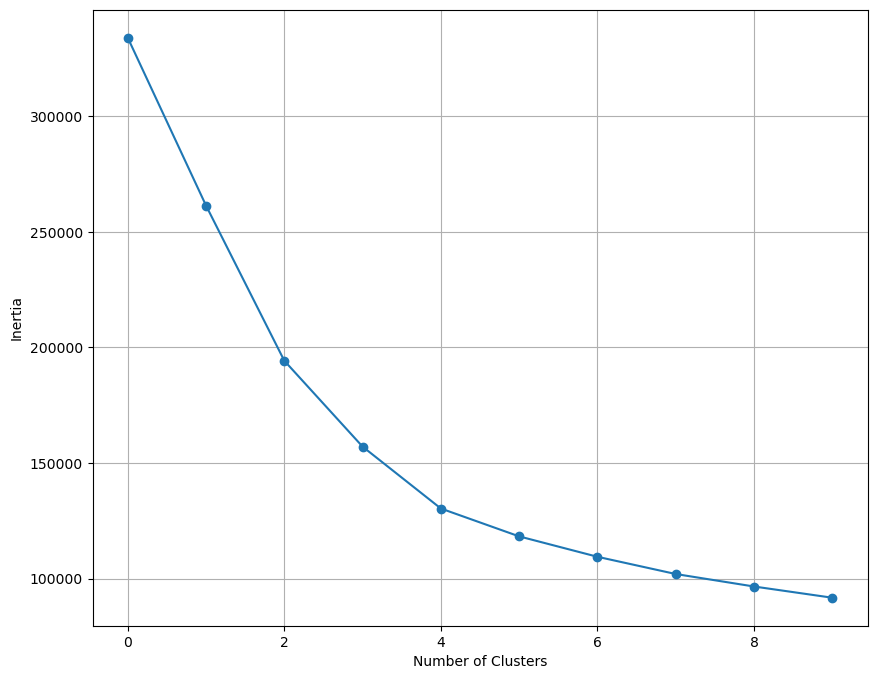

In [37]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pdf.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(inertia,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Based on the Elbow Graph above, the optimal number of clusters would be 4/5 clusters**

### Fitting Model - KMeans

In [38]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit_predict(pdf)

array([3, 3, 3, ..., 0, 0, 4])

In [39]:
pdf['labels'] = kmeans.labels_

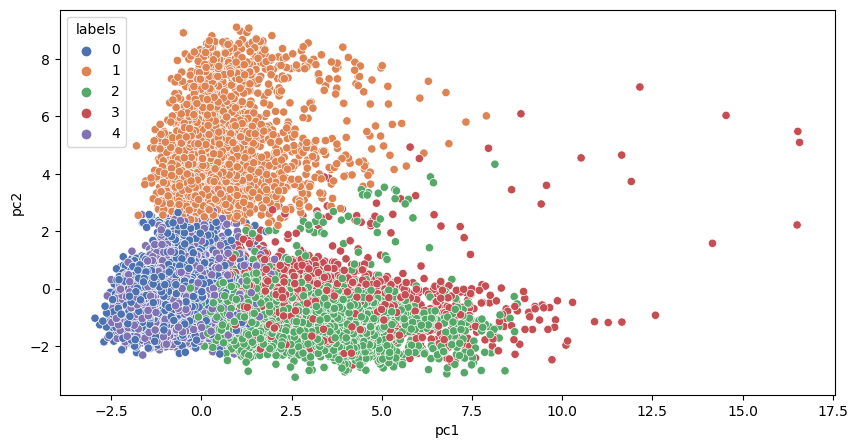

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pdf, x='pc1', y='pc2', hue='labels', palette='deep')
plt.show()

# Evaluate Model

Silhouette average score for k=2:  0.4345735921287983
Silhouette average score for k=3:  0.488373279274574
Silhouette average score for k=4:  0.5379157724357159
Silhouette average score for k=5:  0.5540346086522641
Silhouette average score for k=6:  0.3790101984792811


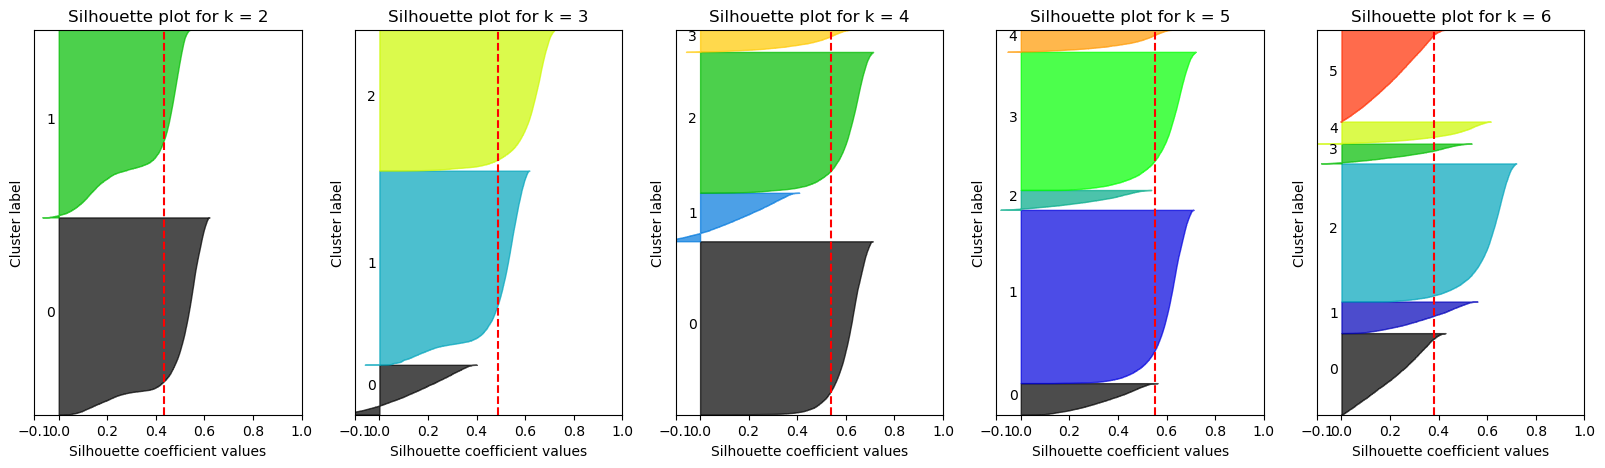

In [41]:
from sklearn.metrics import silhouette_score, silhouette_samples

# define range of k values
k_values = range(2, 7)

# create subplots
fig, axs = plt.subplots(1, len(k_values), figsize=(20, 5))

# iterate over each k value
for i, k in enumerate(k_values):
    # fit k-means model
    kmeans_eval = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    #labels = kmeans_eval.labels_
    labels = kmeans_eval.fit_predict(pdf)

    # calculate silhouette score
    silhouette_avg = silhouette_score(pdf, labels)

    # calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pdf, labels)

    print(f"Silhouette average score for k={k}: ", silhouette_avg)
    
    # plot silhouette plot
    y_lower = 10
    axs[i].set_xlim([-0.1, 1])
    axs[i].set_ylim([0, len(pdf) + (k + 1) * 10])
    axs[i].set_title('Silhouette plot for k = {}'.format(k))
    axs[i].set_xlabel('Silhouette coefficient values')
    axs[i].set_ylabel('Cluster label')

    for j in range(k):
        # aggregate silhouette scores for samples in cluster j
        ith_cluster_silhouette_values = sample_silhouette_values[labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0,
                              ith_cluster_silhouette_values,
                              facecolor=color,
                              edgecolor=color,
                              alpha=0.7)

        # label silhouette plots with their cluster numbers at the middle
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # compute new y_lower for next plot
        y_lower = y_upper + 10

    axs[i].axvline(x=silhouette_avg, color='red', linestyle='--')
    axs[i].set_yticks([])
    axs[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


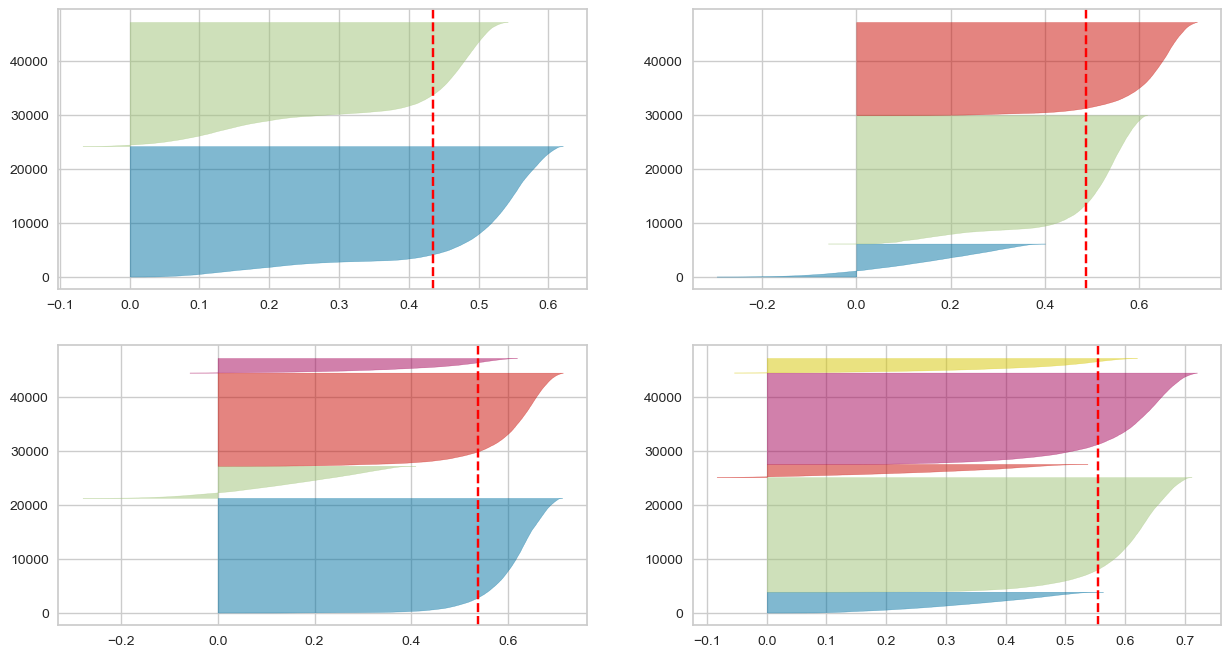

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pdf) 

**Based on the width of every cluster and the average silhoueete score, it can be seen that 5 clusters can be a good option of clustering**

# Business Insight

### Returning the Preprocessed dataframe to original

In [44]:
pdf.drop(columns=['labels'], inplace=True)
for col in cats:
    codes = df_encode[col].unique()
    labels = df[col].unique()
    mapping = dict(zip(codes, labels))
    df_encode[col] = df_encode[col].replace(mapping)

predict = kmeans.predict(pdf)
df_encode['labels_cluster'] = pd.Series(predict, index=df_encode.index)

In [45]:
df_encode.sample(10)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,dow_ffp_date,dow_first_flight_date,dow_load_date,dow_last_flight_date,labels_cluster
32090,Female,4,HK,FR,CN,39.0,113,112.400000,0,0.665954,5908,0,6,6,0,1,0
59148,Male,4,NEYAGAWA,shanghaishi,CN,29.0,343,102.000000,0,0.750000,1159,0,5,5,0,2,0
4958,Male,4,Shimonikawa-gun,KANAGAWA-KEN,CN,45.0,177,21.083333,0,0.871109,26343,0,1,1,0,0,4
8560,Male,5,guangzhou,shanghai,CN,60.0,1,34.000000,0,1.314135,27140,1,6,5,0,0,3
12525,Male,4,lushan,beijing,CN,56.0,23,29.695652,0,0.682453,15468,1,0,3,0,6,4
26012,Female,4,guangzhou,beijing,CN,45.0,233,54.571429,0,0.817849,6819,0,5,0,0,0,4
7782,Female,4,shanghaishi,0,CN,47.0,128,20.814815,0,0.794086,24854,0,2,4,0,0,0
58641,Female,4,London,SAITAMA,CN,27.0,358,47.000000,0,0.674795,874,0,3,3,0,1,1
33800,Male,4,yingkou,ZUID HOLLAND,CN,32.0,47,51.166667,0,0.480680,2695,0,6,1,0,4,0
58446,Male,4,guangzhou,beijing,CN,49.0,537,107.000000,0,0.574990,1029,0,2,2,0,4,4


In [46]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47194 entries, 43 to 62986
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 47194 non-null  object 
 1   FFP_TIER               47194 non-null  int64  
 2   WORK_CITY              47194 non-null  object 
 3   WORK_PROVINCE          47194 non-null  object 
 4   WORK_COUNTRY           47194 non-null  object 
 5   AGE                    47194 non-null  float64
 6   LAST_TO_END            47194 non-null  int64  
 7   AVG_INTERVAL           47194 non-null  float64
 8   EXCHANGE_COUNT         47194 non-null  int64  
 9   avg_discount           47194 non-null  float64
 10  Points_Sum             47194 non-null  int64  
 11  Point_NotFlight        47194 non-null  int64  
 12  dow_ffp_date           47194 non-null  int64  
 13  dow_first_flight_date  47194 non-null  int64  
 14  dow_load_date          47194 non-null  int64  
 15  d

In [47]:
num_dtypes = ['int32','int64','float64']
cat_dtypes = ['object']

num_df = df_encode.select_dtypes(include=num_dtypes)
cat_df = df_encode.select_dtypes(include=cat_dtypes)

numericals = num_df.columns
categoricals = cat_df.columns

In [48]:
df_encode[numericals].groupby('labels_cluster').agg(['mean', 'median', 'std'])

FFP_TIER                         AGE                    \
                    mean median       std       mean median        std   
labels_cluster                                                           
0               4.002869    4.0  0.053488  41.828230   41.0   9.767048   
1               4.010011    4.0  0.099572  47.358917   47.0  11.371599   
2               4.071965    4.0  0.275907  42.680818   41.0   9.327593   
3               4.902761    5.0  0.674299  48.119077   47.0   9.334063   
4               4.003423    4.0  0.058405  41.915673   41.0   9.678833   

               LAST_TO_END                    AVG_INTERVAL             \
                      mean median         std         mean     median   
labels_cluster                                                          
0               198.017450  135.0  186.799511    77.469067  52.750000   
1               269.225065  226.0  211.038854    64.557637  43.750000   
2               104.402019   56.0  127.707728    47.841602  36.133333   
3                51.483725   19.0   86.458907    33.198032  22.521739   
4               195.412605  132.0  185.476756    77.976159  53.333333   

                          EXCHANGE_COUNT                  avg_discount  \
                      std           mean median       std         mean   
labels_cluster                                                           
0               84.296452       0.000235    0.0  0.015334     0.699363   
1               74.928889       0.024101    0.0  0.169474     0.758546   
2               41.505709       1.014497    1.0  0.652682     0.719753   
3               38.777955       0.060569    0.0  0.252029     0.936500   
4               84.377530       0.000295    0.0  0.017175     0.701645   

                                      Points_Sum                         \
                  median       std          mean   median           std   
labels_cluster                                                            
0               0.699347  0.167662   6433.966794   4501.0   5883.397237   
1               0.747557  0.187580   8803.414905   4980.0  11117.372743   
2               0.712657  0.143528  16156.643282  13835.0  11045.475947   
3               0.841258  0.257418  32805.367532  29915.0  21864.788917   
4               0.700000  0.168042   6468.417857   4505.0   5985.634181   

               Point_NotFlight                  dow_ffp_date                   \
                          mean median       std         mean median       std   
labels_cluster                                                                  
0                     0.084991    0.0  0.285872     4.124453    4.0  1.490148   
1                     0.168706    0.0  0.458289     3.018539    3.0  1.954895   
2                     1.555527    2.0  0.496972     2.826819    3.0  1.901861   
3                     0.550062    0.0  0.707593     2.946848    3.0  1.881500   
4                     0.096601    0.0  0.308325     1.427239    1.0  1.292847   

               dow_first_flight_date                  dow_load_date         \
                                mean median       std          mean median   
labels_cluster                                                               
0                           4.189314    4.0  1.512740           0.0    0.0   
1                           3.005933    3.0  1.989578           0.0    0.0   
2                           2.875227    3.0  1.932701           0.0    0.0   
3                           3.006180    3.0  1.921470           0.0    0.0   
4                           1.416795    1.0  1.286037           0.0    0.0   

                    dow_last_flight_date                   
                std                 mean median       std  
labels_cluster                                             
0               0.0             3.015568    3.0  2.029392  
1               0.0             3.026326    3.0  2.003255  
2               0.0             2.960135    3.0  2.033883  
3         

In [49]:
df_encode[categoricals].join(df_encode['labels_cluster']).groupby('labels_cluster').agg(pd.Series.mode)

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
labels_cluster,,,,
0,Male,PUCHONG,beijing,CN
1,Male,EDOGAWA-KU,SHIZUOKA PREF,GN
2,Male,guangzhou,beijing,CN
3,Male,guangzhou,beijing,CN
4,Male,PUCHONG,beijing,CN


In [50]:
df_encode['labels_cluster'].value_counts()

0    21261
4    16946
2     3863
1     2697
3     2427
Name: labels_cluster, dtype: int64